In [33]:
!pip install opencv-python


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [37]:
DATADIR="C:/Users/pc-hp/Desktop/machine learning projects/men-women-classification/dataset/training"
CATEGORIES=['Male', 'Female']

C:/Users/pc-hp/Desktop/machine learning projects/men-women-classification/dataset/training\Male


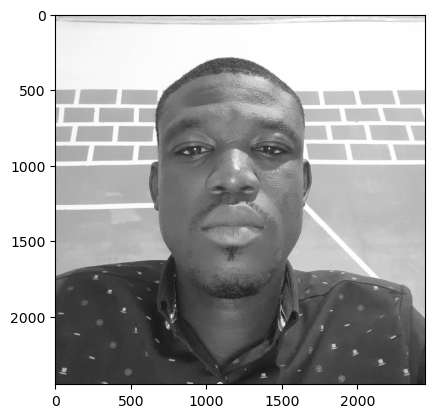

In [38]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)  # Path to the category directory
    print(path)

    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()  # Added to display the image
        break  # Only display the first image in each category

    break  # Only iterate through the first category

In [39]:
print(img_array)

[[212 212 213 ... 225 226 224]
 [212 212 213 ... 224 224 224]
 [211 211 213 ... 220 219 220]
 ...
 [ 53  53  55 ...  48  45  43]
 [ 49  50  51 ...  47  45  42]
 [ 45  47  47 ...  47  48  46]]


(2448, 2448)


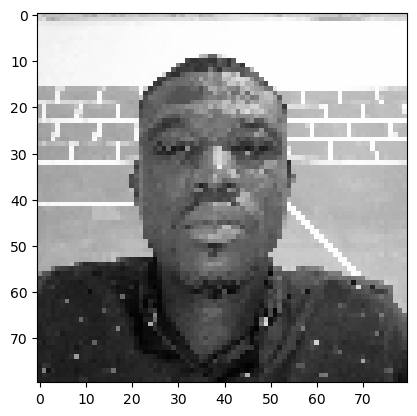

In [40]:
print(img_array.shape)

# Set the desired size for the image
IMG_SIZE = 80

# Resize the image
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

# Display the resized image
plt.imshow(new_array, cmap="gray")
plt.show()

In [41]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  # path to the category directory
        class_num = CATEGORIES.index(category)
        print(path)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

# Call the function to create training data
create_training_data()

C:/Users/pc-hp/Desktop/machine learning projects/men-women-classification/dataset/training\Male
C:/Users/pc-hp/Desktop/machine learning projects/men-women-classification/dataset/training\Female


In [42]:
 print (len(training_data))

220


In [43]:
#now we will shuffle the data
import random
random. shuffle(training_data)

In [44]:
for sample in training_data[:10]:
    print (sample[1])

1
1
1
1
0
0
1
1
0
0


In [45]:
x = []  # Assuming x is initially an empty list
y = []
for features, label in training_data:
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [46]:
import pickle
pickle_out=open("x.pickle", "wb")
pickle.dump(x,pickle_out)
pickle_out.close()
pickle_out=open("y.pickle", "wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [47]:
pickle_in = open("x.pickle", "rb")
x=pickle. load(pickle_in)

In [48]:
x[1]

array([[[184],
        [181],
        [185],
        ...,
        [183],
        [197],
        [192]],

       [[178],
        [176],
        [137],
        ...,
        [190],
        [191],
        [202]],

       [[115],
        [101],
        [ 71],
        ...,
        [198],
        [195],
        [200]],

       ...,

       [[249],
        [243],
        [231],
        ...,
        [160],
        [155],
        [148]],

       [[245],
        [236],
        [215],
        ...,
        [154],
        [148],
        [139]],

       [[237],
        [228],
        [207],
        ...,
        [152],
        [149],
        [141]]], dtype=uint8)

In [51]:
print("Shape of x:", x.shape)
y = np.array(y)
print("Shape of y:", y.shape)

Shape of x: (220, 80, 80, 1)
Shape of y: (220,)


In [52]:
!pip install tensorflow

In [53]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

x = pickle.load(open("x.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# Normalize the input data
x = np.array(x) / 255.0

# Define the CNN model
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()


C:\Users\pc-hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 78, 78, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 78, 78, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 39, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,327,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,364,801 (5.21 MB)

 Trainable params: 1,364,801 (5.21 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
x = np.array(x)
y = np.array(y)

In [55]:
# Train the model
model.fit(x, y, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.5293 - loss: 0.7027 - val_accuracy: 0.3182 - val_loss: 0.7090
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5299 - loss: 0.6862 - val_accuracy: 0.6364 - val_loss: 0.6581
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6342 - loss: 0.6544 - val_accuracy: 0.3182 - val_loss: 0.7981
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6326 - loss: 0.6094 - val_accuracy: 0.3636 - val_loss: 0.8721
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.6562 - loss: 0.5892 - val_accuracy: 0.6818 - val_loss: 0.5499
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.7555 - loss: 0.5099 - val_accuracy: 0.7273 - val_loss: 0.5652
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.7729 - loss: 0.4534 - val_accuracy: 0.6818 - val_loss: 0.6013
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8038 - loss: 0.4541 - val_accuracy: 0.5455 - val_loss: 0.7976

In [66]:
model.save(r'C:/Users/pc-hp/Desktop/machine learning projects/men-women-classification/datasett64x3-CNN.keras')

In [67]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
CATEGORIES=[ 'Male', 'Female']
def prepare(filepath):
  IMG_SIZE=80
  img_array=cv2. imread (filepath, cv2. IMREAD_GRAYSCALE)
  new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  plt. imshow(img_array)
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE,1)


model=tf.keras.models. load_model(r'C:/Users/pc-hp/Desktop/machine learning projects/men-women-classification/datasett64x3-CNN.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Dhia is=Male and Monira is=Female


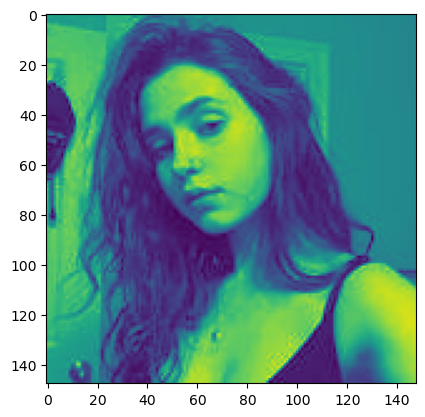

In [69]:
prediction1 = model.predict([prepare(r'C:\Users\pc-hp\Desktop\machine learning projects\men-women-classification\Dhia.jpg')])
prediction2 = model.predict([prepare(r'C:\Users\pc-hp\Desktop\machine learning projects\men-women-classification\Monira.jpg')])

print("Dhia is={} and Monira is={}".format(CATEGORIES[int(prediction1[0][0])], CATEGORIES[int(prediction2[0][0])]))

1/1 [==============================] - 0s 40ms/step
gender=Female 


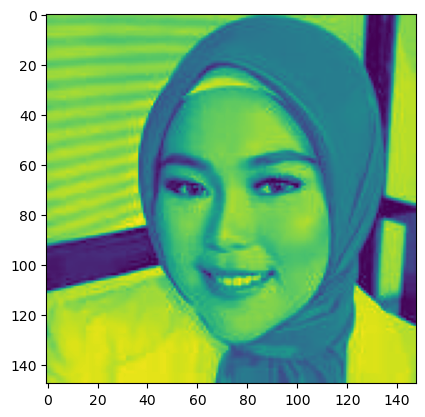

In [40]:
prediction=model.predict([prepare(r'C:\Users\TechnoMax\Desktop\machine learning projects\men-women-classification\Amal.jpg')])
print ("gender={0} " .format (CATEGORIES[int (prediction[0][0])]))

1/1 [==============================] - 0s 36ms/step
gender=Male


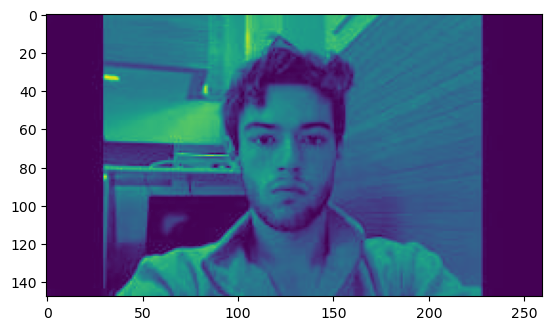

In [43]:
prediction = model.predict([prepare(r'C:\Users\TechnoMax\Desktop\machine learning projects\men-women-classification\Sofi.jpg')])
print("gender={}".format(CATEGORIES[int(prediction[0][0])]))

1/1 [==============================] - 0s 47ms/step
gender=Male


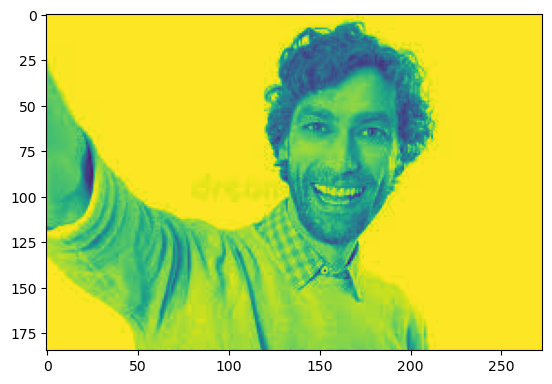

In [45]:
prediction = model.predict([prepare(r'C:\Users\TechnoMax\Desktop\machine learning projects\men-women-classification\amir.jpg')])
print("gender={}".format(CATEGORIES[int(prediction[0][0])]))

1/1 [==============================] - 0s 46ms/step
gender=Male


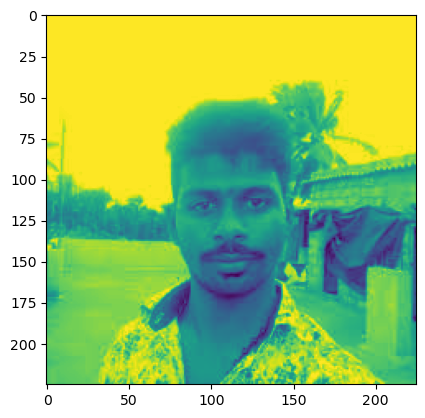

In [49]:
prediction=model.predict([prepare(r'C:\Users\TechnoMax\Desktop\machine learning projects\men-women-classification\internal_pointers_boy.jpg')])
print("gender={}".format(CATEGORIES[int(prediction[0][0])]))